# Visualizing using graphviz

In [11]:
import graphviz
import pickle
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import pydotplus
from six import StringIO 
from IPython.display import Image

[Text(0.48060344827586204, 0.9166666666666666, 'beds <= 21.424\nentropy = 1.0\nsamples = 65473\nvalue = [40.768, 40.768]'),
 Text(0.23706896551724138, 0.75, 'beds <= 9.994\nentropy = 0.576\nsamples = 14220\nvalue = [36.748, 5.827]'),
 Text(0.13793103448275862, 0.5833333333333334, 'admits <= 1.558\nentropy = 0.433\nsamples = 9217\nvalue = [30.846, 3.014]'),
 Text(0.06896551724137931, 0.4166666666666667, 'cases <= 24.5\nentropy = 0.335\nsamples = 5749\nvalue = [22.75, 1.499]'),
 Text(0.034482758620689655, 0.25, 'deaths <= 0.308\nentropy = 0.221\nsamples = 1957\nvalue = [9.305, 0.341]'),
 Text(0.017241379310344827, 0.08333333333333333, 'entropy = 0.152\nsamples = 771\nvalue = [4.064, 0.091]'),
 Text(0.05172413793103448, 0.08333333333333333, 'entropy = 0.267\nsamples = 1186\nvalue = [5.241, 0.25]'),
 Text(0.10344827586206896, 0.25, 'cases <= 132.5\nentropy = 0.4\nsamples = 3792\nvalue = [13.445, 1.158]'),
 Text(0.08620689655172414, 0.08333333333333333, 'entropy = 0.368\nsamples = 2796\nval

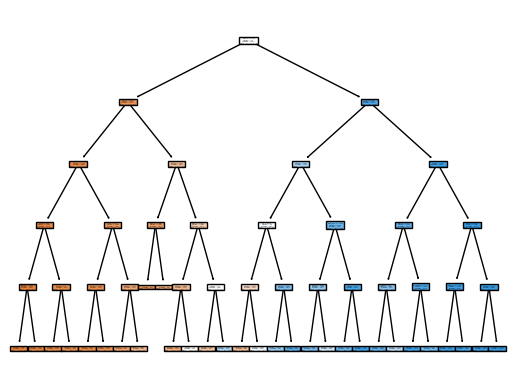

In [5]:
model_name = f"CDC_full_auroc_0.8390_period_unpruned.sav"
#pickle.dump(clf, open(model_name, 'wb'))
clf = pickle.load(open(model_name, 'rb'))
plot_tree(clf, feature_names=['cases','delta_cases', 'deaths', 'delta_deaths', 'admits', 'delta_admits', 'icu', 'delta_icu',  'beds', 'delta_beds' 'perc_covid', 'delta_perc', 'beds_over_15_100k'], filled=True)

In [ ]:
plot_tree(clf, feature_names=['cases','delta_cases', 'deaths', 'delta_deaths', 'admits', 'delta_admits', 'icu', 'delta_icu',  'beds', 'delta_beds' 'perc_covid', 'delta_perc', 'beds_over_15_100k'], filled=True)

In [88]:
feature_names=['Cases','\u0394 Cases', 'Deaths', '\u0394 Deaths', 'Admissions', '\u0394 Admissions', 'ICU', '\u0394 ICU',  'Beds', '\u0394 Beds', 'Percent of beds', '\u0394 Perc. beds', 'Hospital capacity exceeded']

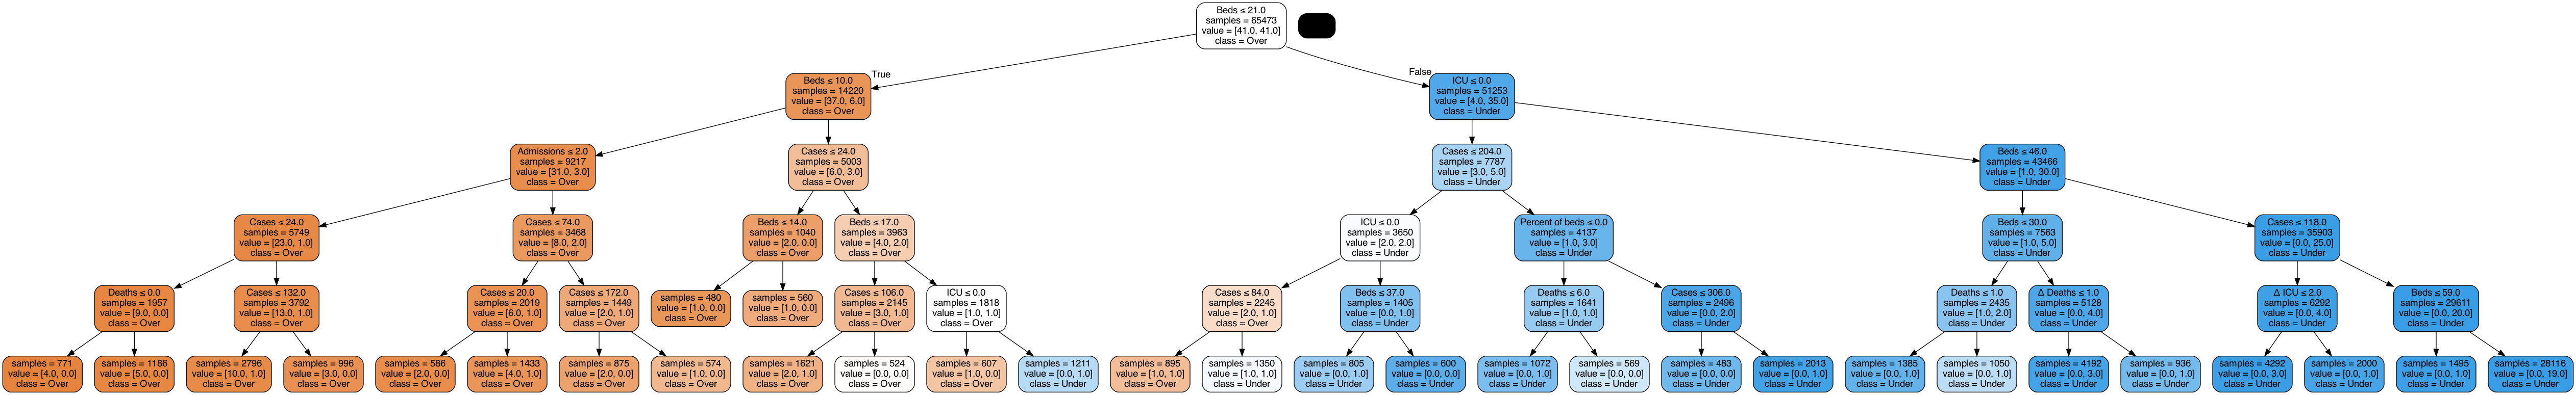

In [90]:
dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['Over', 'Under'], # the target names.
 feature_names= feature_names, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True, 
 proportion=False,
 precision = 0, 
 impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [92]:
            for node in graph.get_node_list():
                if node.get_attributes().get('label') is None:
                    continue
                else:
                    split_label = node.get_attributes().get('label').split('<br/>')
                    if len(split_label) == 4:
                        split_label[3]  =  split_label[3].split('=')[1].strip()

                        del(split_label[1])  # number of samples
                        del(split_label[1])  # split of sample
                    elif len(split_label) == 3:  # for a terminating node, no rule is provided
                        split_label[2]  =  split_label[2].split('=')[1].strip()


                        del(split_label[0])  # number of samples
                        del(split_label[0])  # split of samples
                        split_label[0] = '<' + split_label[0]
                    node.set('label', '<br/>'.join(split_label))


In [96]:
Image(graph.create_png())
graph.write_png('Graphs/Full_classifier_3_week_period_pruned_simplified.png')
#plt.savefig('Graphs/Full_classifier_3_week_period_pruned_simplified.png', dpi = 300)

True